<a href="https://colab.research.google.com/github/diegoturenne/Application-Oriented-Deep-Learning-Course-2022-UU/blob/main/Exercise_7_1_CIFAR_10_DT_FD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tabulate import tabulate
layers = tf.keras.layers

The code block below defines a few helper functions to visualize the results. You do not need to touch them. 

In [ ]:
def plot_examples(X, Y, n=10):
    """ Plot the first n examples for each of the 10 classes in the CIFAR dataset X, Y """
    fig, axes = plt.subplots(n, 10, figsize=(10, n))
    for l in range(10):
        axes[0, l].set_title(cifar10_labels[l], fontsize="smaller")
        m = np.squeeze(Y) == l  # boolean mask: True for all images of label l
        for i in range(n):
            image = X[m][i].astype("uint8")  # imshow expects uint8
            ax = axes[i, l]
            ax.imshow(image, origin="upper")
            ax.set(xticks=[], yticks=[])
    return fig, ax


def plot_prediction(X, Y, Y_predict):
    """
    Plot image X along with predicted probabilities Y_predict.
    X: CIFAR image, shape = (32, 32, 3)
    Y: CIFAR label, one-hot encoded, shape = (10)
    Y_predict: predicted probabilities, shape = (10)
    """
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4))

    # plot image
    ax1.imshow(X.astype("uint8"), origin="upper")
    ax1.set(xticks=[], yticks=[])

    # plot probabilities
    ax2.barh(np.arange(10), Y_predict, align="center")
    ax2.set(xlim=(0, 1), xlabel="Score", yticks=[])
    for i in range(10):
        c = "red" if (i == np.argmax(Y)) else "black"
        ax2.text(0.05, i, cifar10_labels[i].capitalize(), ha="left", va="center", color=c)



def plot_confusion(Y_true, Y_predict):
    """
    Plot confusion matrix
    Y_true:    array of true classifications (0-9), shape = (N)
    Y_predict: array of predicted classifications (0-9), shape = (N)
    """
    C = np.histogram2d(Y_true, Y_predict, bins=np.linspace(-0.5, 9.5, 11))[0]
    Cn = C / np.sum(C, axis=1)

    fig = plt.figure()
    plt.imshow(Cn, interpolation="nearest", vmin=0, vmax=1, cmap=plt.cm.YlGnBu)
    plt.colorbar()
    plt.xlabel("prediction")
    plt.ylabel("truth")
    plt.xticks(range(10), cifar10_labels, rotation="vertical")
    plt.yticks(range(10), cifar10_labels)
    for x in range(10):
        for y in range(10):
            plt.annotate("%i" % C[x, y], xy=(y, x), ha="center", va="center")



First we load and preprocess CIFAR-10 data. The imagages are 32x32 pixels and have three color channels (red, green blue). 

In [ ]:

# X: images, Y: labels
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

print("images, shape = ", x_train.shape)
print("labels, shape = ", y_train.shape)

cifar10_labels = np.array([                                                                                                                                                                       
    'airplane',                                                                                                                                                                                   
    'automobile',                                                                                                                                                                                 
    'bird',                                                                                                                                                                                       
    'cat',                                                                                                                                                                                        
    'deer',                                                                                                                                                                                       
    'dog',                                                                                                                                                                                        
    'frog',                                                                                                                                                                                       
    'horse',                                                                                                                                                                                      
    'ship',                                                                                                                                                                                       
    'truck'])  

170498071/170498071 [==============================] - 2s 0us/step
images, shape =  (50000, 32, 32, 3)
labels, shape =  (50000, 1)


(<Figure size 720x720 with 100 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f8ff7388550>)

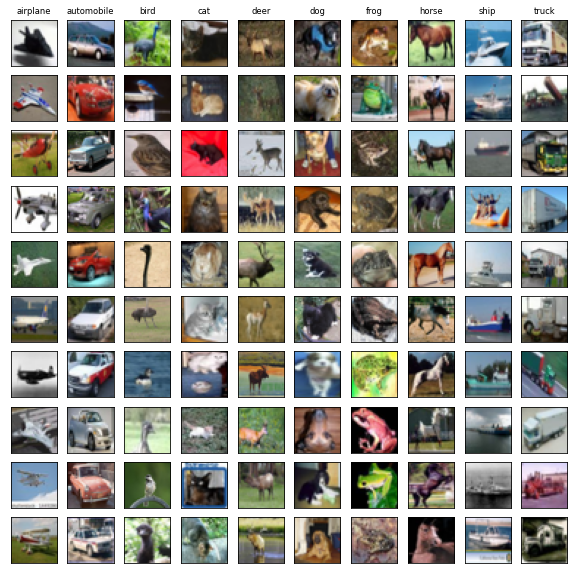

In [ ]:
# Hint: To plot example images, you can use the plot examples function
plot_examples(x_train, y_train)

In [ ]:
# convert labels ("0"-"9") to one-hot encodings, "0" = (1, 0, ... 0) and so on
y_train_onehot = tf.keras.utils.to_categorical(y_train, 10)
y_test_onehot = tf.keras.utils.to_categorical(y_test, 10)[:8000]
y_valid_onehot = tf.keras.utils.to_categorical(y_test, 10)[8000:]


x_valid = x_test[8000:]/255
x_test = x_test[:8000]/255
x_train = x_train/255

# Hint: use 20% of the training data for validation
# isnt it already set when you declared y_valid_oneshot though ? 

In [ ]:
model = tf.keras.models.Sequential([
    layers.Dense(128, input_shape=(784,)),
    layers.Activation('relu'),
    layers.Dropout(0.5),
    layers.Dense(10),
    layers.Activation('softmax')])  # softmax actication to transform output into probabiliites

We start with a fully connected network

In [ ]:
# # ----------------------------------------------------------
# # Define model
# # ----------------------------------------------------------
# model = tf.keras.models.Sequential([
#     layers.Flatten(input_shape=(32, 32, 3)),  # (32,32,3) --> (3072)
#     layers.Dense(256, activation='relu'),
#     layers.Dropout(0.4),
#     layers.Dense(256, activation='relu'),

#     layers.Dense(10),
#     layers.Activation('softmax')
#         # this time the flatten operation is directly integrated into the network 
#         # structure so that we can use the same input data later for a convolutional neural network. 
#         # Hint: remember that the output layer should have 10 nodes with a softmax activation
#     ],
#     name="nn",
# )

# print(model.summary())

def dense_block(x, n=8)
""" Create a block of n densely connected pairs of convolutions """
  xlist = [x]
  for i in range(n):
    x = layers.Conv2D(8, (3, 3), padding='same', activation='relu')(x)
    xlist.append(x)
    x = layers.concatenate(xlist[:], axis=-1)
  return x


x0 = Input(shape= (50000, 32, 32, 3) , name='input') # some tensor of shape say (n, nx, ny, 64)
x = dense_block(x0)
x = layers.Conv2D(64, (1, 1), padding='same', activation='relu')(x)
x = layers.AveragePooling2D((2, 2), strides=(2, 2))(x)
x = dense_block(x)
x = GlobalAveragePooling2D(name='final_globalpooling')(x)
x = Dense(num_classes, activation='softmax')(x)
model = keras.models.Model(inputs=[x0], outputs=[x], name='DenseNet'

print(model.summary())

Model: "nn"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 3072)              0         
                                                                 
 dense_2 (Dense)             (None, 256)               786688    
                                                                 
 dropout_1 (Dropout)         (None, 256)               0         
                                                                 
 dense_3 (Dense)             (None, 256)               65792     
                                                                 
 dense_4 (Dense)             (None, 10)                2570      
                                                                 
 activation_2 (Activation)   (None, 10)                0         
                                                                 
Total params: 855,050
Trainable params: 855,050
Non-trainable pa

In [ ]:
# ----------------------------------------------------------
# Training
# ----------------------------------------------------------
model.compile(
    loss='categorical_crossentropy',  # the recommended loss for a classification task is 'categorical_crossentropy' (see lecture for details)
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
    metrics=['accuracy']) 

model.fit(
    x_train, y_train_onehot,
    validation_data=(x_valid, y_valid_onehot),

    batch_size=64,
    epochs=20, # train at least for 20 epochs
    verbose=2,
    # validation_data=(x_valid, y_valid_onehot),
    callbacks=[tf.keras.callbacks.CSVLogger("history_{}.csv".format(model.name))],
)

Epoch 1/20
782/782 - 8s - loss: 2.0576 - accuracy: 0.2241 - val_loss: 1.9446 - val_accuracy: 0.2535 - 8s/epoch - 10ms/step
Epoch 2/20
782/782 - 7s - loss: 1.9784 - accuracy: 0.2509 - val_loss: 1.9315 - val_accuracy: 0.2995 - 7s/epoch - 9ms/step
Epoch 3/20
782/782 - 7s - loss: 1.9382 - accuracy: 0.2733 - val_loss: 1.8872 - val_accuracy: 0.3275 - 7s/epoch - 9ms/step
Epoch 4/20
782/782 - 7s - loss: 1.9151 - accuracy: 0.2875 - val_loss: 1.8673 - val_accuracy: 0.3515 - 7s/epoch - 9ms/step
Epoch 5/20
782/782 - 7s - loss: 1.8966 - accuracy: 0.2953 - val_loss: 1.8533 - val_accuracy: 0.3460 - 7s/epoch - 8ms/step
Epoch 6/20
782/782 - 7s - loss: 1.8823 - accuracy: 0.3012 - val_loss: 1.8447 - val_accuracy: 0.3335 - 7s/epoch - 9ms/step
Epoch 7/20
782/782 - 7s - loss: 1.8775 - accuracy: 0.3045 - val_loss: 1.8336 - val_accuracy: 0.3500 - 7s/epoch - 9ms/step
Epoch 8/20
782/782 - 7s - loss: 1.8651 - accuracy: 0.3095 - val_loss: 1.8685 - val_accuracy: 0.3580 - 7s/epoch - 9ms/step
Epoch 9/20
782/782 - 7s

In [ ]:

# # ------------------------
# # ---     Plotting     ---
# # ------------------------

# # plot training history
# history = np.genfromtxt(f"history_{model.name}.csv", delimiter=",", names=True)

# fig, ax = plt.subplots(1)
# ax.plot(history["epoch"], history["train_loss"], label="training")
# ax.plot(history["epoch"], history["val_loss"], label="validation")
# ax.legend()
# ax.set(xlabel="epoch", ylabel="loss")

# fig, ax = plt.subplots(1)
# ax.plot(history["epoch"], history["train_acc"], label="training")
# ax.plot(history["epoch"], history["val_accuracy"], label="validation")
# ax.legend()
# ax.set(xlabel="epoch", ylabel="accuracy")

63/63 [==============================] - 1s 6ms/step


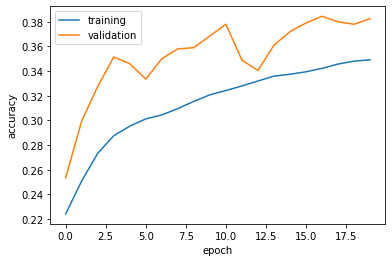

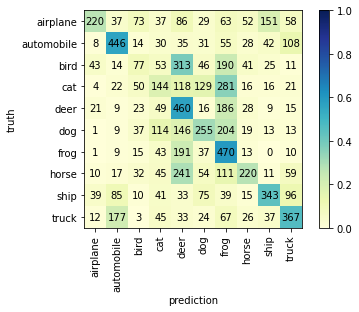

In [ ]:
# ----------------------------------------------------------
# Plots
# ----------------------------------------------------------
# training curves
history = np.genfromtxt("history_{}.csv".format(model.name), delimiter=",", names=True)

fig, ax = plt.subplots(1)
ax.plot(history["epoch"], history["accuracy"], label="training")
ax.plot(history["epoch"], history["val_accuracy"], label="validation")
ax.legend()
ax.set(xlabel="epoch", ylabel="accuracy")


# Hint: this is how you can plot the confusion matrix. 
# calculate predictions for test set
y_predict = model.predict(x_test, batch_size=128)

# convert back to class labels (0-9)
y_predict_cl = np.argmax(y_predict, axis=1)
y_test_cl = np.argmax(y_test_onehot, axis=1)

# plot confusion matrix
plot_confusion(y_test_cl, y_predict_cl)

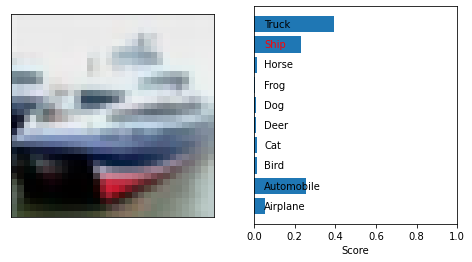

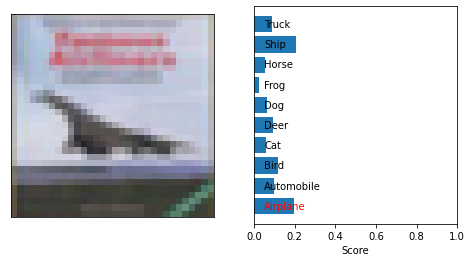

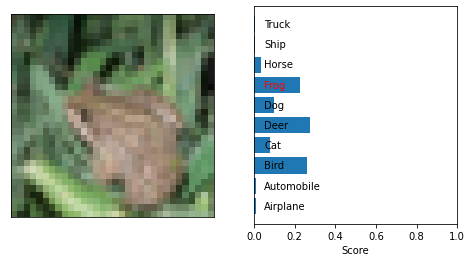

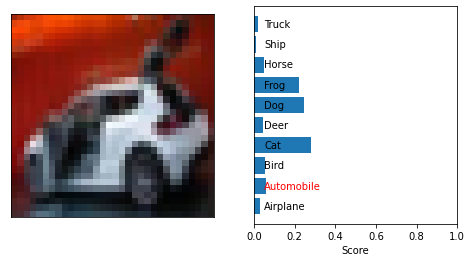

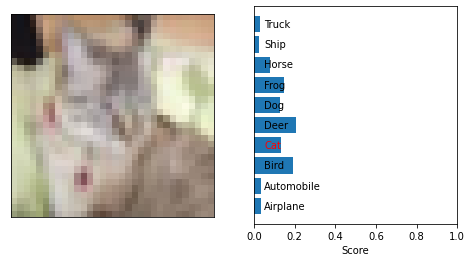

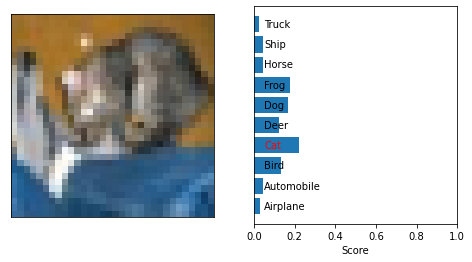

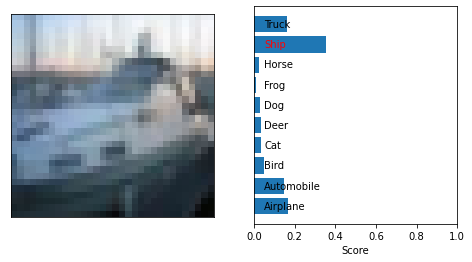

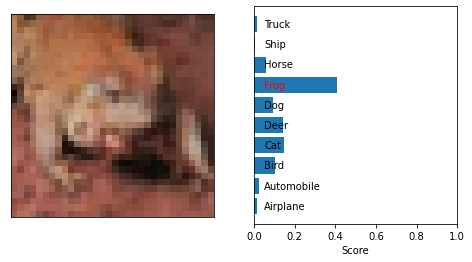

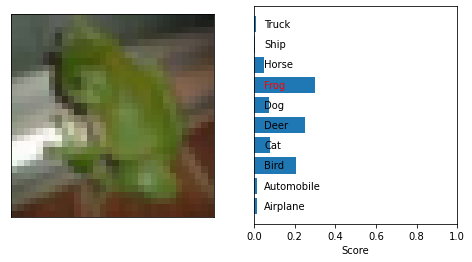

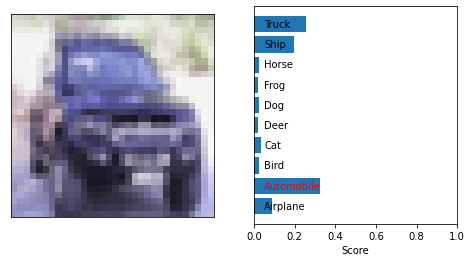

In [ ]:
# Task: plot a few examples of correctly and incorrectly classified images. 
# Hint: First find the indices of correctly and incorrectly classified images:
m = y_predict_cl == y_test_cl
i0 = np.arange(8000)[~m]  # misclassified images
i1 = np.arange(8000)[m]  # correctly classified images

# original (unnormalized) test images
x_test = x_test[:8000]

# Hint: Now you can use the `plot_prediction` function to plot the images:
# plot first 5 false classifications
for i in i0[0:5]:
    plot_prediction(x_test[i]*255, y_test_onehot[i], y_predict[i])

# plot first 5 True classifications
for i in i1[0:5]:
    plot_prediction(x_test[i]*255, y_test_onehot[i], y_predict[i])

**CNN**
In the second part of this exercise, classify the images with a CNN.


In [ ]:
# Hint: this code snipped shows how to define convolution and maxpooling layers. For more information see 
# https://keras.io/api/layers/convolution_layers/convolution2d/
# https://keras.io/api/layers/pooling_layers/max_pooling2d/
model = tf.keras.models.Sequential(
    [
        layers.Conv2D(16, kernel_size=(3, 3), padding="same", activation="relu", input_shape=(32, 32, 3)),
        layers.MaxPooling2D((2,2)),
        # add additional convolution layer and max pooling layer here, 
        layers.Conv2D(32, kernel_size=(3, 3), padding="same", activation="relu", input_shape=(32, 32, 3)),
        layers.MaxPooling2D((2,2)),
        # Flatten the output (i.e. make a 1D vector out of it)
        layers.Flatten(),  # (32,32,3) --> (3072)
        # add dropout and output layer
        layers.Dropout(0.4),
        layers.Dense(10),
        layers.Activation('softmax')
    ],
    name="cnn",
)

print(model.summary())

Model: "cnn"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 16)        448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 8, 8, 32)         0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 2048)              0         
                                                                 
 dropout_2 (Dropout)         (None, 2048)              0       

In [ ]:
# ----------------------------------------------------------
# Training
# ----------------------------------------------------------
model.compile(
    loss='categorical_crossentropy',  # the recommended loss for a classification task is 'categorical_crossentropy' (see lecture for details)
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
    metrics=['accuracy']) 


model.fit(
    x_train, y_train_onehot,
    validation_data=(x_valid, y_valid_onehot),
    batch_size=64,
    epochs=40,
    callbacks=[tf.keras.callbacks.CSVLogger("history_{}.csv".format(model.name))],
)

Epoch 1/40
782/782 [==============================] - 50s 63ms/step - loss: 1.6272 - accuracy: 0.4175 - val_loss: 1.4100 - val_accuracy: 0.4955
Epoch 2/40
782/782 [==============================] - 49s 63ms/step - loss: 1.3326 - accuracy: 0.5308 - val_loss: 1.2280 - val_accuracy: 0.5535
Epoch 3/40
782/782 [==============================] - 49s 63ms/step - loss: 1.2220 - accuracy: 0.5725 - val_loss: 1.1369 - val_accuracy: 0.6050
Epoch 4/40
782/782 [==============================] - 51s 65ms/step - loss: 1.1526 - accuracy: 0.5969 - val_loss: 1.0775 - val_accuracy: 0.6235
Epoch 5/40
782/782 [==============================] - 49s 62ms/step - loss: 1.1014 - accuracy: 0.6177 - val_loss: 1.0541 - val_accuracy: 0.6430
Epoch 6/40
782/782 [==============================] - 48s 62ms/step - loss: 1.0661 - accuracy: 0.6290 - val_loss: 1.0327 - val_accuracy: 0.6485
Epoch 7/40
782/782 [==============================] - 48s 62ms/step - loss: 1.0335 - accuracy: 0.6428 - val_loss: 1.0063 - val_accuracy:

63/63 [==============================] - 2s 34ms/step


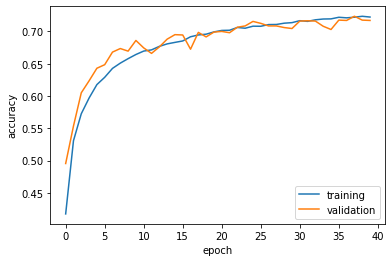

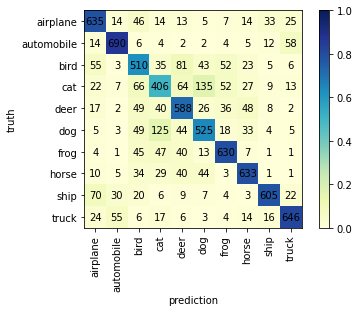

In [ ]:
# ----------------------------------------------------------
# Plots
# ----------------------------------------------------------
# training curves
history = np.genfromtxt("history_{}.csv".format(model.name), delimiter=",", names=True)

fig, ax = plt.subplots(1)
ax.plot(history["epoch"], history["accuracy"], label="training")
ax.plot(history["epoch"], history["val_accuracy"], label="validation")
ax.legend()
ax.set(xlabel="epoch", ylabel="accuracy")


# Hint: this is how you can plot the confusion matrix. 
# calculate predictions for test set
y_predict = model.predict(x_test, batch_size=128)

# convert back to class labels (0-9)
y_predict_cl = np.argmax(y_predict, axis=1)
y_test_cl = np.argmax(y_test_onehot, axis=1)

# plot confusion matrix
plot_confusion(y_test_cl, y_predict_cl)

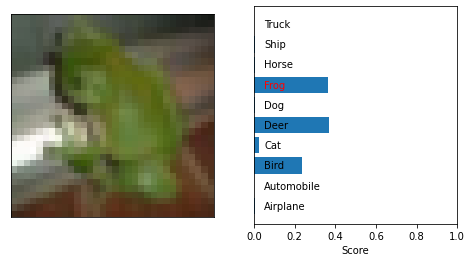

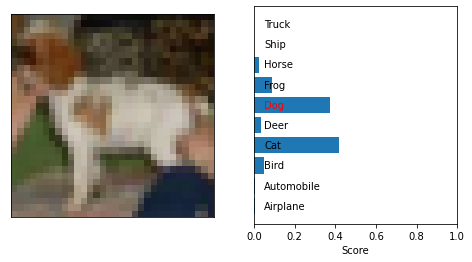

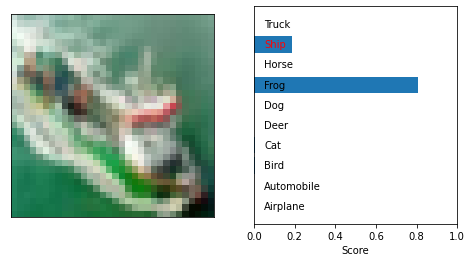

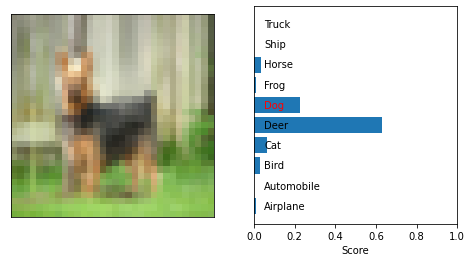

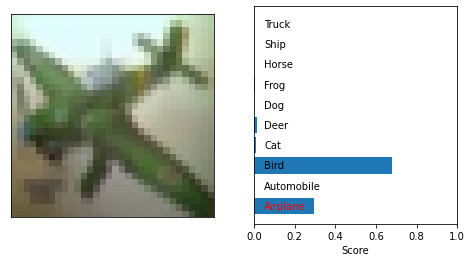

In [ ]:
# Task: plot a few examples of correctly and incorrectly classified images. 
# Hint: First find the indices of correctly and incorrectly classified images:
m = y_predict_cl == y_test_cl
i0 = np.arange(8000)[~m]  # misclassified images
i1 = np.arange(8000)[m]  # correctly classified images

# original (unnormalized) test images
x_test = x_test[:8000]

# plot first 5 false classifications
for i in i0[0:5]:
    plot_prediction(x_test[i]*255, y_test_onehot[i], y_predict[i])

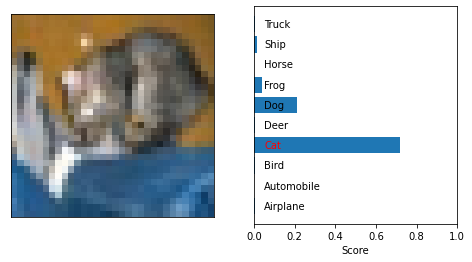

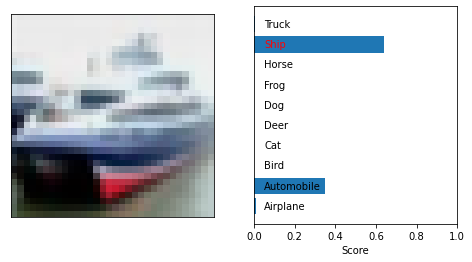

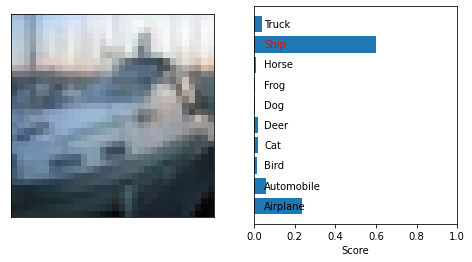

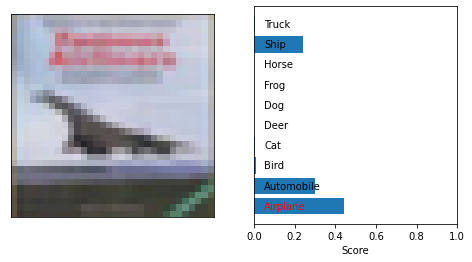

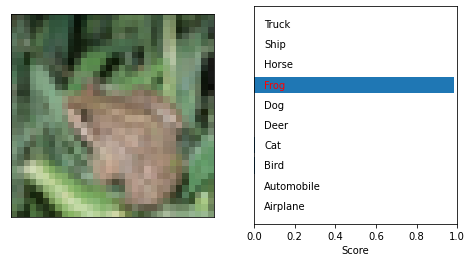

In [ ]:
# plot first 5 True classifications
for i in i1[0:5]:
    plot_prediction(x_test[i]*255, y_test_onehot[i], y_predict[i])